# Calculate the observed amplitudes with data.

Define constants

In [1]:
from math import sqrt, radians, atan2, atan, tan, degrees
from IPython.display import Latex
import numpy as np
font_size=14
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu

In [5]:
A_bz=   np.array([-17.6, 20.3])
A_bz_e= np.array([5.5 , 5.6])
A_bz_mean= np.average(A_bz,weights=1/A_bz_e**2)
A_bz_mean_e = 1.0/np.sqrt(np.sum(1.0/A_bz_e**2))
ds_names=('1999', "2000")
ds_colors=["k", "k"]
ds_markers=["o", "o"]

print("Mean B_z=", A_bz_mean, "+-", A_bz_mean_e)
# par, par_e, pcov, chi2_ndf, ndf = cu.fit_and_chi2(np.array([0,1]), A_bz, A_bz_e, cu.parallel, [0.0])

Mean B_z= 1.0085862684629125 +- 3.9239648833518226


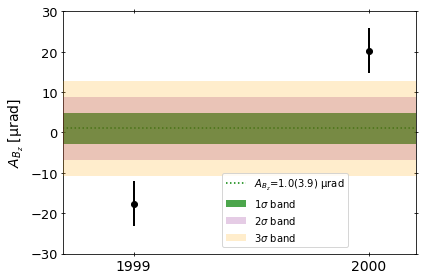

In [5]:
fig, ax = cu.plot_fom(ds_names, A_bz, A_bz_e, ds_colors, ds_markers, y_label=r"$A_{B_z} \ [\rm{\mu}$rad]", no_legend=True, BNL=True)
ax.set_xlim(0.7, 2.2)
ax.set_ylim(-30, 30)
ax.plot([0,5],[A_bz_mean, A_bz_mean], ls=":", c="g", zorder=1, label=r"$A_{B_z}$="+str(round(A_bz_mean,1))+"("+str(round(A_bz_mean_e,1))+r") $\rm{\mu}$rad")
# ax.plot([0,5],[br_mean+br_mean_e, br_mean+br_mean_e], ls="--", c="orange")
# ax.plot([0,5],[br_mean-br_mean_e, br_mean-br_mean_e], ls="--", c="orange")
ax.set_xlabel("")
plt.xticks(fontsize=14)

ax.add_patch(patches.Rectangle(
        xy=(0, A_bz_mean-A_bz_mean_e),  # point of origin.
        width=5,
        height=A_bz_mean_e*2,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.7,
        zorder=2,
         label=r"$1\sigma$ band"
    )
)

band_width=2
ax.add_patch(patches.Rectangle(
        xy=(0, A_bz_mean-(A_bz_mean_e*band_width)),  # point of origin.
        width=5,
        height=A_bz_mean_e*band_width*2,
        linewidth=0,
        color='purple',
        fill=True,
        alpha=0.2,
        zorder=3,
        label=str(band_width)+r"$\sigma$ band"
    )
)

band_width=3
ax.add_patch(patches.Rectangle(
        xy=(0, A_bz_mean-(A_bz_mean_e*band_width)),  # point of origin.
        width=5,
        height=A_bz_mean_e*band_width*2,
        linewidth=0,
        color='orange',
        fill=True,
        alpha=0.2,
        zorder=3,
        label=str(band_width)+r"$\sigma$ band"
    )
)

plt.legend(fontsize=10, loc=(0.45,0.028))
plt.tight_layout()
fig.savefig("../fig/sum_A_bz_BNL.png", dpi=300, bbox_inches='tight');